# Projeto II -  Futuro dos Dados e Aplicação de Big Data

Júlio Cézar de Souza Barbosa (1904612)

Rickson das Neves Tavares (2072486)

# Avaliação 1 - Introdução e Fundamentação Teórica (Primeira parte): Descrição do Problema

### Prevendo Ações com Machine Learning

O mercado de ações é algo bem complexo, pois, existem diversos fatores que influenciam no preço dos ativos. Fatores estes que sao difíceis de prever, ou ainda, que estão fora do controle até mesmo de profissionais da área. Dessa forma utilizaremos Machine Learning para nos ajudar a prever ações da bolsa de valores.

### Objetivo

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever ações da bolsa de valores.

### Especificação Técnica

Para um melhor resultado do modelo foi realizado um ETL de dados históricos extraídos do site da BOVESPA(https://www.b3.com.br/pt_br/) do ano de 2020.
Foi utilizado um layout do arquivo das cotações históricas disponibilizado no site da BOVESPA para uma melhor compreensão dos dados, informando a posição dos dados necessários para o projeto.

Métodos de Pŕe-processamento: Extração de dados, Limpeza da base, verificação e remoção de dados faltantes, remoção de colunas irrelevantes, adição de médias móveis, como uma forma de otimizar o desempenho dos algoritmos.

Tarefa de Aprendizado: Será aplicado a tarefa de Regressão Linear e Redes Neurais.

Métricas de Avaliação: Acurácia, r2_score, rn.score, search.score.

Algoritmos Avaliados: Para prever as ações iremos utilizar o modelo LR, Redes Neurais e Redes Neurais com Hiper Parâmetros.

# Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

### Realizando o ETL dos dados históricos

In [1]:
#ETL dos dados IBOVESPA
import pandas as pd

In [2]:
colspecs = [(2,10),
             (10,12),
             (12,24),
             (27,39),
             (56,69),
             (69,82),
             (82,95),
             (108,121),
             (152,170),
             (170,188)
]

names = ['data_pregao', 'codbi', 'sigla_acao', 'nome_acao', 'preco_abertura', 'preco_maximo', 'preco_minimo', 'preco_fechamento', 'qtd_negocios', 'volume_negocios']

dados = pd.read_fwf('COTAHIST_A2020.txt', colspecs = colspecs, names = names, skiprows = 1)

dados

,data_pregao,codbi,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,20200102,2.0,AALR3,ALLIAR,1829.0,1900.0,1828.0,1900.0,585800.0,1.094620e+09
1,20200102,2.0,AAPL34,APPLE,12000.0,12134.0,12000.0,12134.0,12700.0,1.533380e+08
2,20200102,2.0,ABCB4,ABC BRASIL,2000.0,2030.0,1982.0,2030.0,870400.0,1.745788e+09
3,20200102,2.0,ABEV3,AMBEV S/A,1886.0,1925.0,1878.0,1920.0,16011300.0,3.062348e+10
4,20200102,2.0,ADHM3,ADVANCED-DH,255.0,255.0,235.0,248.0,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...,...
1251642,20201230,82.0,YDUQN330,YDUQE FM,248.0,248.0,226.0,226.0,600.0,1.466000e+05
1251643,20201230,82.0,YDUQM340,YDUQE FM,183.0,190.0,183.0,190.0,6400.0,1.173300e+06
1251644,20201230,82.0,YDUQN340,YDUQE FM,291.0,291.0,286.0,286.0,7500.0,2.175000e+06
1251645,20201230,82.0,YDUQO330,YDUQE,285.0,285.0,270.0,270.0,1500.0,4.125000e+05


In [3]:
#Filtrando ações padrões
dados = dados[dados['codbi']== 2]
dados = dados.drop(['codbi'], 1)
dados

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,20200102,AALR3,ALLIAR,1829.0,1900.0,1828.0,1900.0,585800.0,1.094620e+09
1,20200102,AAPL34,APPLE,12000.0,12134.0,12000.0,12134.0,12700.0,1.533380e+08
2,20200102,ABCB4,ABC BRASIL,2000.0,2030.0,1982.0,2030.0,870400.0,1.745788e+09
3,20200102,ABEV3,AMBEV S/A,1886.0,1925.0,1878.0,1920.0,16011300.0,3.062348e+10
4,20200102,ADHM3,ADVANCED-DH,255.0,255.0,235.0,248.0,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...
294499,20201228,Z1TO34,ZTO EXPRESS,3672.0,3672.0,3672.0,3672.0,37.0,1.358640e+05
294500,20201229,Z1TO34,ZTO EXPRESS,3631.0,3631.0,3631.0,3631.0,100.0,3.631000e+05
294501,20201230,Z1TO34,ZTO EXPRESS,3809.0,3809.0,3750.0,3750.0,61.0,2.295170e+05
294502,20201223,Z1TS34,ZOETIS INC,20918.0,20918.0,20918.0,20918.0,50.0,1.045900e+06


In [4]:
#Ajustando data
dados['data_pregao'] = pd.to_datetime(dados['data_pregao'], format = '%Y%m%d')
dados

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2020-01-02,AALR3,ALLIAR,1829.0,1900.0,1828.0,1900.0,585800.0,1.094620e+09
1,2020-01-02,AAPL34,APPLE,12000.0,12134.0,12000.0,12134.0,12700.0,1.533380e+08
2,2020-01-02,ABCB4,ABC BRASIL,2000.0,2030.0,1982.0,2030.0,870400.0,1.745788e+09
3,2020-01-02,ABEV3,AMBEV S/A,1886.0,1925.0,1878.0,1920.0,16011300.0,3.062348e+10
4,2020-01-02,ADHM3,ADVANCED-DH,255.0,255.0,235.0,248.0,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...
294499,2020-12-28,Z1TO34,ZTO EXPRESS,3672.0,3672.0,3672.0,3672.0,37.0,1.358640e+05
294500,2020-12-29,Z1TO34,ZTO EXPRESS,3631.0,3631.0,3631.0,3631.0,100.0,3.631000e+05
294501,2020-12-30,Z1TO34,ZTO EXPRESS,3809.0,3809.0,3750.0,3750.0,61.0,2.295170e+05
294502,2020-12-23,Z1TS34,ZOETIS INC,20918.0,20918.0,20918.0,20918.0,50.0,1.045900e+06


In [5]:
#Ajuste dos campos numéricos
dados['preco_abertura'] = (dados['preco_abertura']/100)
dados['preco_maximo'] = (dados['preco_maximo']/100)
dados['preco_minimo'] = (dados['preco_minimo']/100)                     
dados['preco_fechamento'] = (dados['preco_fechamento']/100)
dados

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2020-01-02,AALR3,ALLIAR,18.29,19.00,18.28,19.00,585800.0,1.094620e+09
1,2020-01-02,AAPL34,APPLE,120.00,121.34,120.00,121.34,12700.0,1.533380e+08
2,2020-01-02,ABCB4,ABC BRASIL,20.00,20.30,19.82,20.30,870400.0,1.745788e+09
3,2020-01-02,ABEV3,AMBEV S/A,18.86,19.25,18.78,19.20,16011300.0,3.062348e+10
4,2020-01-02,ADHM3,ADVANCED-DH,2.55,2.55,2.35,2.48,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...
294499,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,36.72,37.0,1.358640e+05
294500,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,36.31,100.0,3.631000e+05
294501,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,37.50,61.0,2.295170e+05
294502,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,209.18,50.0,1.045900e+06


In [6]:
dados.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios               float64
volume_negocios            float64
dtype: object

In [7]:
#Salvando os dados extraídos e filtrados
dados.to_csv('dadosacoes.csv')

### Utilizando os dados filtrados

In [8]:
#importando as bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
#lendo o csv com os arquivos das ações

df = pd.read_csv("dadosacoes.csv")
df

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,0,2020-01-02,AALR3,ALLIAR,18.29,19.00,18.28,19.00,585800.0,1.094620e+09
1,1,2020-01-02,AAPL34,APPLE,120.00,121.34,120.00,121.34,12700.0,1.533380e+08
2,2,2020-01-02,ABCB4,ABC BRASIL,20.00,20.30,19.82,20.30,870400.0,1.745788e+09
3,3,2020-01-02,ABEV3,AMBEV S/A,18.86,19.25,18.78,19.20,16011300.0,3.062348e+10
4,4,2020-01-02,ADHM3,ADVANCED-DH,2.55,2.55,2.35,2.48,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...,...
122221,294499,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,36.72,37.0,1.358640e+05
122222,294500,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,36.31,100.0,3.631000e+05
122223,294501,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,37.50,61.0,2.295170e+05
122224,294502,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,209.18,50.0,1.045900e+06


## Análise exploratória e Pré-Processamento dos dados

In [10]:
#Filtrando ações do Itau
df_itau = df[df['sigla_acao'] == 'ITUB4']
df_itau

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
202,202,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,38.03,20666100.0,7.812151e+10
844,2252,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.63,24891400.0,9.400384e+10
845,2253,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,37.07,22294700.0,8.294725e+10
2273,5696,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,36.21,20000900.0,7.294927e+10
2274,5697,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,35.62,25980900.0,9.345243e+10
...,...,...,...,...,...,...,...,...,...,...
120314,290076,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.25,19659000.0,6.169132e+10
120315,290077,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,31.94,19959200.0,6.356557e+10
120316,290078,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.17,15444600.0,4.973340e+10
120317,290079,2020-12-29,ITUB4,ITAUUNIBANCO,32.27,32.39,31.93,32.10,16384200.0,5.254648e+10


In [11]:
#Verificando o tipo das variáveis
df_itau.dtypes

id                    int64
data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios        float64
volume_negocios     float64
dtype: object

In [12]:
#Mudando o tipo data
df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'], format='%Y-%m-%d')

In [13]:
df_itau.dtypes

id                           int64
data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios               float64
volume_negocios            float64
dtype: object

Text(0.5, 0, 'Data do Pregao')

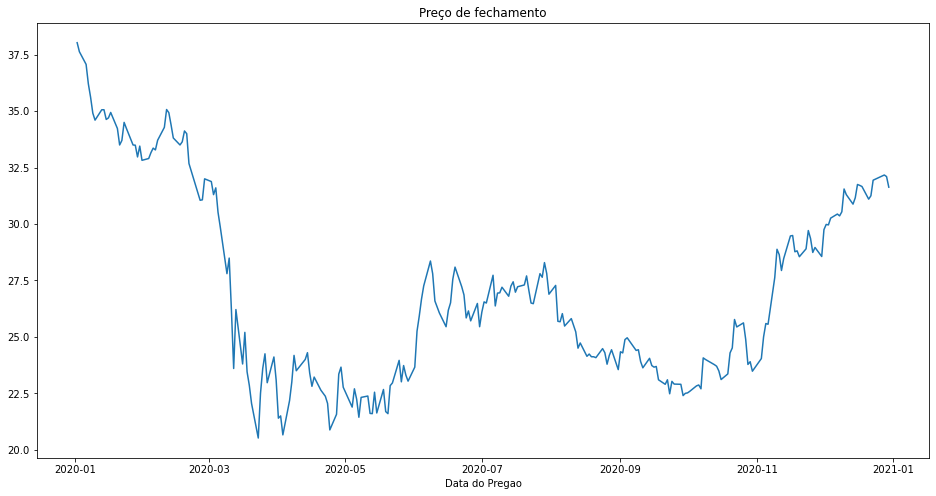

In [14]:
plt.figure(figsize=(16, 8))
plt.title('Preço de fechamento')
plt.plot(df_itau['data_pregao'], df_itau['preco_fechamento'])
plt.xlabel('Data do Pregao')

In [15]:
#Criando campos de médias móveis
df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()

In [16]:
df_itau.head(10)

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
202,202,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,38.03,20666100.0,7.812151e+10,NaN,NaN
844,2252,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.63,24891400.0,9.400384e+10,NaN,NaN
845,2253,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,37.07,22294700.0,8.294725e+10,NaN,NaN
2273,5696,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,36.21,20000900.0,7.294927e+10,NaN,NaN
2274,5697,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,35.62,25980900.0,9.345243e+10,36.912,NaN
2275,5698,2020-01-09,ITUB4,ITAUUNIBANCO,35.79,35.93,34.52,34.91,48423800.0,1.694589e+11,36.288,NaN
2276,5699,2020-01-10,ITUB4,ITAUUNIBANCO,35.08,35.45,34.57,34.60,25521600.0,8.900229e+10,35.682,NaN
4821,12419,2020-01-13,ITUB4,ITAUUNIBANCO,35.02,35.40,34.74,35.06,29200700.0,1.025651e+11,35.280,NaN
4822,12420,2020-01-14,ITUB4,ITAUUNIBANCO,34.92,35.06,34.63,35.06,18433300.0,6.424604e+10,35.050,NaN
4823,12421,2020-01-15,ITUB4,ITAUUNIBANCO,34.89,34.94,34.40,34.63,32757500.0,1.134815e+11,34.852,NaN


In [17]:
#Empurrando os valores das ações para frente
df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)
df_itau.head(10)

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
202,202,2020-01-02,ITUB4,ITAUUNIBANCO,37.28,38.03,36.99,37.63,20666100.0,7.812151e+10,NaN,NaN
844,2252,2020-01-03,ITUB4,ITAUUNIBANCO,37.50,38.24,37.45,37.07,24891400.0,9.400384e+10,NaN,NaN
845,2253,2020-01-06,ITUB4,ITAUUNIBANCO,37.55,37.58,36.91,36.21,22294700.0,8.294725e+10,NaN,NaN
2273,5696,2020-01-07,ITUB4,ITAUUNIBANCO,37.07,37.24,36.21,35.62,20000900.0,7.294927e+10,NaN,NaN
2274,5697,2020-01-08,ITUB4,ITAUUNIBANCO,36.45,36.81,35.62,34.91,25980900.0,9.345243e+10,36.912,NaN
2275,5698,2020-01-09,ITUB4,ITAUUNIBANCO,35.79,35.93,34.52,34.60,48423800.0,1.694589e+11,36.288,NaN
2276,5699,2020-01-10,ITUB4,ITAUUNIBANCO,35.08,35.45,34.57,35.06,25521600.0,8.900229e+10,35.682,NaN
4821,12419,2020-01-13,ITUB4,ITAUUNIBANCO,35.02,35.40,34.74,35.06,29200700.0,1.025651e+11,35.280,NaN
4822,12420,2020-01-14,ITUB4,ITAUUNIBANCO,34.92,35.06,34.63,34.63,18433300.0,6.424604e+10,35.050,NaN
4823,12421,2020-01-15,ITUB4,ITAUUNIBANCO,34.89,34.94,34.40,34.70,32757500.0,1.134815e+11,34.852,NaN


In [18]:
#retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau

,id,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
8321,21676,2020-01-30,ITUB4,ITAUUNIBANCO,32.65,33.45,32.58,32.82,41789800.0,1.374939e+11,33.530,34.859048
8322,21677,2020-01-31,ITUB4,ITAUUNIBANCO,32.99,33.39,32.54,32.90,25459800.0,8.358342e+10,33.246,34.610952
8323,21685,2020-02-03,ITUB4,ITAUUNIBANCO,33.00,33.31,32.79,33.16,17586000.0,5.817445e+10,33.126,34.385714
8324,21686,2020-02-04,ITUB4,ITAUUNIBANCO,33.36,33.46,32.90,33.36,15730300.0,5.220127e+10,33.060,34.199524
8325,21687,2020-02-05,ITUB4,ITAUUNIBANCO,33.71,34.12,33.36,33.28,34791900.0,1.169225e+11,33.138,34.063810
...,...,...,...,...,...,...,...,...,...,...,...,...
120313,290075,2020-12-21,ITUB4,ITAUUNIBANCO,31.05,31.50,30.91,31.25,26014600.0,8.122629e+10,31.476,30.315714
120314,290076,2020-12-22,ITUB4,ITAUUNIBANCO,31.17,31.65,31.15,31.94,19659000.0,6.169132e+10,31.494,30.427619
120315,290077,2020-12-23,ITUB4,ITAUUNIBANCO,31.32,32.05,31.27,32.17,19959200.0,6.356557e+10,31.532,30.533810
120316,290078,2020-12-28,ITUB4,ITAUUNIBANCO,32.22,32.43,32.01,32.10,15444600.0,4.973340e+10,31.624,30.667619


In [19]:
#verificando quantidade de linhas
qtd_linhas = len(df_itau)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino -9
qtd_linhas_validacao = qtd_linhas -10

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}:{qtd_linhas}"
)

info


'linhas treino= 0:160 linhas teste= 160:218 linhas validação= 218:228'

In [20]:
#separando as features e labels
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_itau['preco_fechamento']

In [21]:
#Escolhendo as melhores features com Kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocios', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mm21d': 16.712840541134085, 'mm5d': 13.71652820445121, 'volume_negocios': 9.569212886255846, 'qtd_negocios': 1.5415091506668273}


In [22]:
#separando as features escolhidas
features = df_itau.drop(['id', 'sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'qtd_negocios'], 1)

In [23]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale) #Normalizando os dados de entrada(features)



Features:  (228, 5)
[[0.855      0.85230352 0.35767217 0.92422341 1.        ]
 [0.85071429 0.8495935  0.18297206 0.9019454  0.98044515]
 [0.845      0.86653117 0.10063282 0.89253216 0.96269189]
 ...
 [0.755      0.76355014 0.11810304 0.76749294 0.65908494]
 [0.78214286 0.81368564 0.0732791  0.77470976 0.6696318 ]
 [0.77928571 0.80826558 0.08239503 0.7816128  0.68224299]]


In [24]:
#Separa os dados de treino teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

160 160
58 58


# Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição

## Modelo de Regressão Linear

In [25]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.08'

## Modelo de Rede Neural

In [26]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:89.13'

## Modelo de Rede Neural com Hyper Parameters

In [27]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train,y_train)
clf = search.best_estimator_
pred= search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:93.55'

In [28]:
#executando a previsão

previsao = features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full=df_itau['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_itau['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df1=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df1['real'] = df1['real'].shift(+1)

df1.set_index('data_pregao', inplace=True)

print(df1)


              real   previsao
data_pregao                  
2020-04-28     NaN  23.058652
2020-04-29   23.66  23.519055
2020-04-30   22.77  22.914330
2020-05-04   21.89  22.177021
2020-05-05   22.70  22.584233
...            ...        ...
2020-12-21   31.10  30.967085
2020-12-22   31.25  31.146584
2020-12-23   31.94  31.314622
2020-12-28   32.17  31.894567
2020-12-29   32.10  31.839643

[169 rows x 2 columns]


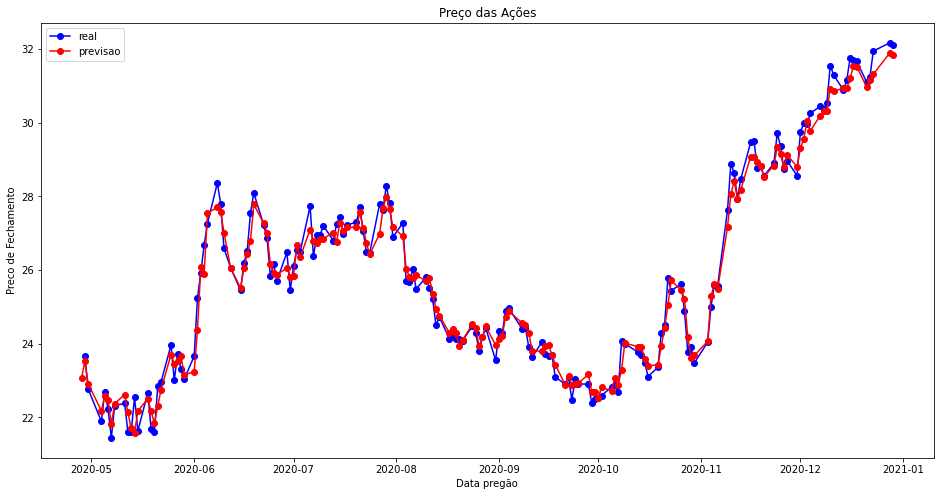

In [29]:
#Gráfico
plt.figure(figsize=(16,8))
plt.title('Preço das Ações')
plt.plot(df1['real'], label="real", color='blue', marker='o')
plt.plot(df1['previsao'], label='previsao', color='red', marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preco de Fechamento')
leg = plt.legend()


# Conclusão

Todos os modelos se mostraram eficientes para prever as nossas ações. Porém usando a regressão linear alcançamos uma acurácia de 95.08%. Já o modelo de rede neural com hiper parâmetros obteve também uma acurácia excelente de 93.55%. Dessa forma escolhemos o modelo de regressão linear para fazer nossas previsões.